## **Final Project 3 Ensemble**
Nama Anggota Kelompok :

1. Dwi Ratna
2. Rara Dita Purnama Reta
3. Muhammad Daffa Izzuddin
4. Nur Khofifah

#### **Dataset**
Dataset yang digunakan pada project ini yaitu heart failure clinical records yang tersedia dari website kaggle melalui [link berikut](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)

Dataset ini  berisi faktor-faktor kematian oleh gagal jantung yang memiliki 13 atribut dengan 299 rows. Atribut yang menjadi target yaitu atribut Death Event/Kematian, sedangkan atribut lainnya merupakan prediktor.

#### **Objective yang ingin dicapai**
Objective yang ingin dicapai dalam analisis ini yaitu:

- Memahami konsep Classification dengan Ensemble Model
- Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
- Dapat mengimplementasikan Ensemble Model untuk membuat prediksi

## **Import Libraries**

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

import pickle

print("Library siap digunakan!")

Library siap digunakan!


## **Data Loading**

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan
explorasi data secara sederhana.

In [141]:
df = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')
print("Dataset berisi {} baris dan {} kolom (atribut)".format(df.shape[0], df.shape[1]))
df.head()

Dataset berisi 299 baris dan 13 kolom (atribut)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Melihat 5 baris terbawah dataset

In [142]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Melihat informasi pada dataset

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Pada tahap ini terdapat 2 tipe data yaitu float dan integer(numerik). Terdapat 299 baris dan 13 kolom

Melihat deskriptif statistik dasar pada kolom numerik

In [144]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Melihat rincian nama kolom

In [145]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Mengelompokan atribut bertipe kategorik dan numerik

In [146]:
categorical = [i for i in df.columns if df[i].dtypes == 'O']

# Variabel bertipe numerik
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: [] 
 numerical:  ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


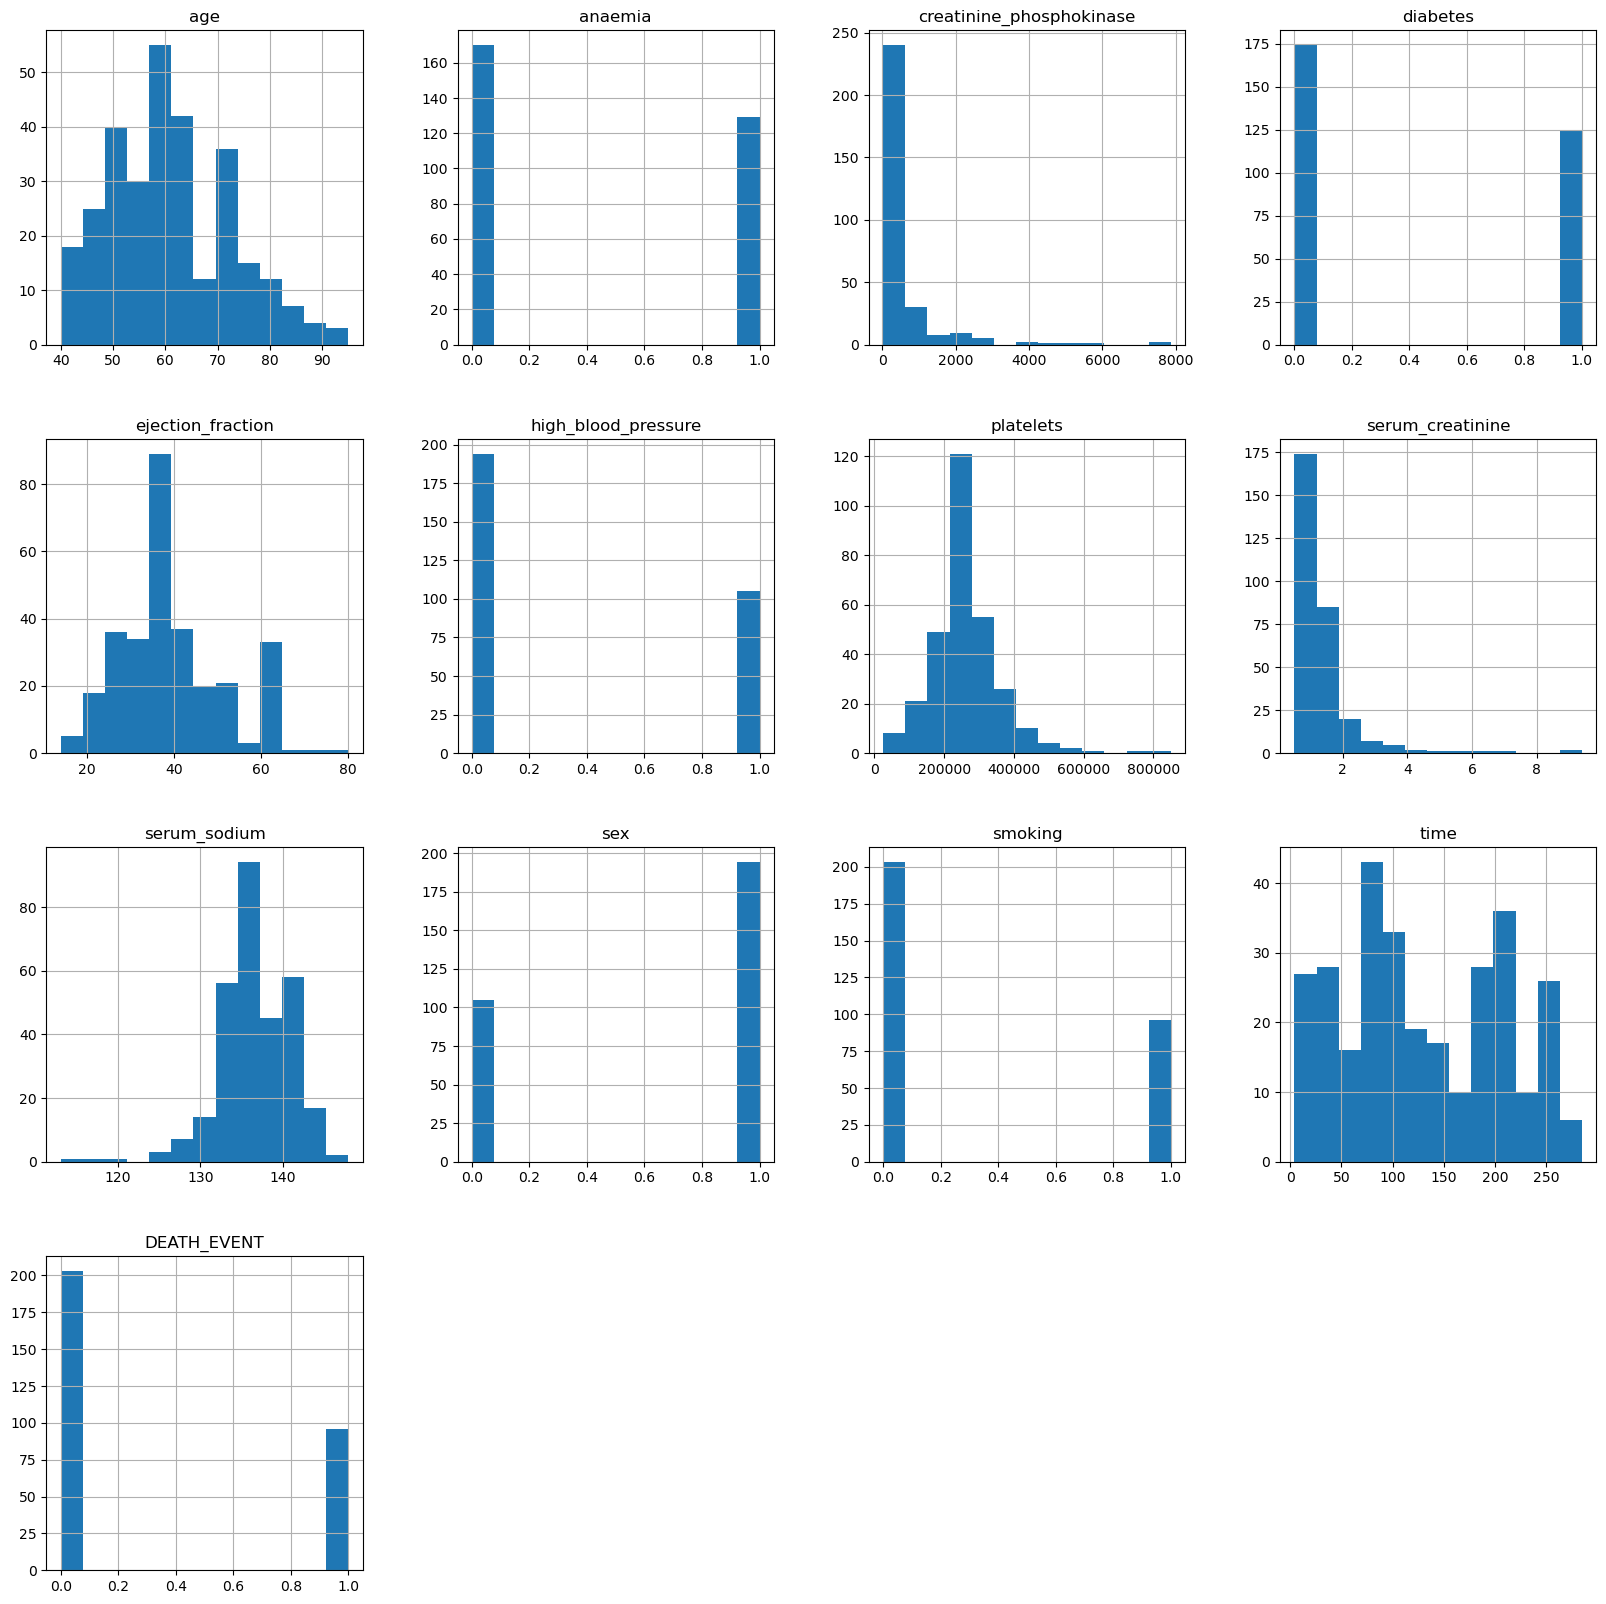

In [147]:
df[numerical].hist(bins=13, figsize=(20,20))
plt.show()

Berdasarkan histogram terlihat bahwa tidak terdapat atribut yang berdistribusi normal dan atribut yang memiliki skewness tinggi, yaitu atribut creatinine_phosphokinase.

## **Data Cleaning**

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut

In [148]:
# Melihat 5 baris teratas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Melihat apakah dataset terdapat duplicated atau tidak

In [149]:
df.duplicated().sum()

0

Dari hasil diatas tidak terdapat duplicated data

Melihat missing value pada dataset

In [150]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Tidak terdapat missing value pada dataset

Melihat jumlah data unik

In [151]:
for col in df.columns:
    print(col,': ', df[col].nunique())

age :  47
anaemia :  2
creatinine_phosphokinase :  208
diabetes :  2
ejection_fraction :  17
high_blood_pressure :  2
platelets :  176
serum_creatinine :  40
serum_sodium :  27
sex :  2
smoking :  2
time :  148
DEATH_EVENT :  2


Melihat keseluruhan unique values dari masing-masing kolom

In [152]:
cols = df.columns.tolist()
for i in cols:
    print(f"Kolom {i}")
    print(df[i].unique())

Kolom age
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
Kolom anaemia
[0 1]
Kolom creatinine_phosphokinase
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   

Dari hasil diatas terlihat pada kolom `age` terdapat nilai yang tidak bulat yaitu 60.667, sehingga perlu dirubah untuk membulatkan nilai tersebut.

Pembulatan value pada data `age`

In [153]:
df['age'].replace([60.667], 60, inplace=True)

In [154]:
df['age'].unique()

array([75., 55., 65., 50., 90., 60., 80., 62., 45., 49., 82., 87., 70.,
       48., 68., 53., 95., 58., 94., 85., 69., 72., 51., 57., 42., 41.,
       67., 79., 59., 44., 63., 86., 66., 43., 46., 61., 81., 52., 64.,
       40., 73., 77., 78., 54., 47., 56.])


### **Menangani outlier**

Mengecek statistik deskriptif dari data bertipe numerik

In [155]:
df[numerical].describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Terlihat pada atribut memiliki rentang yang berbeda

Mengecek boxplot pada atribut numerik

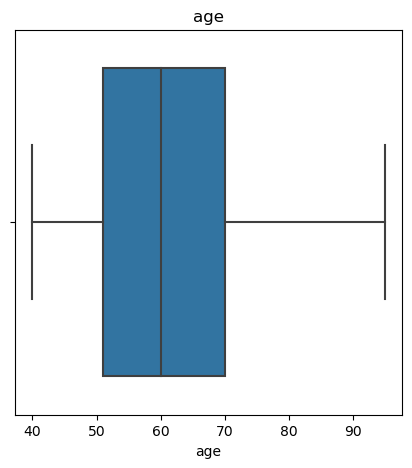

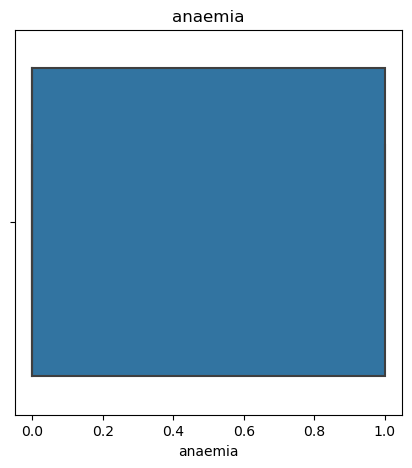

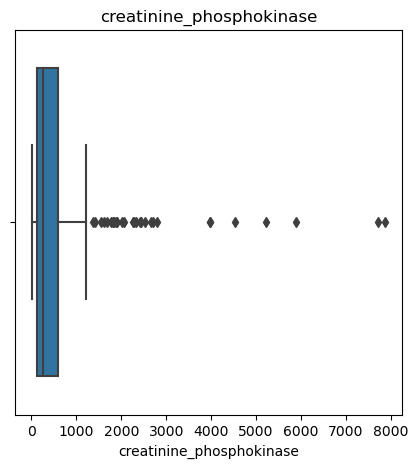

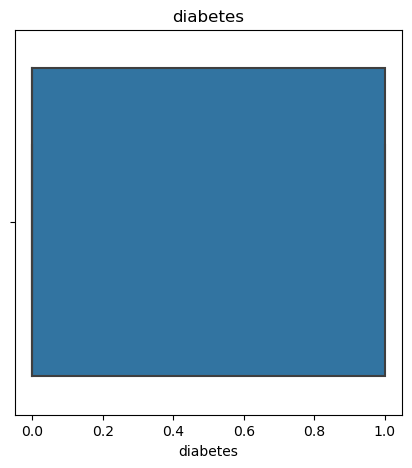

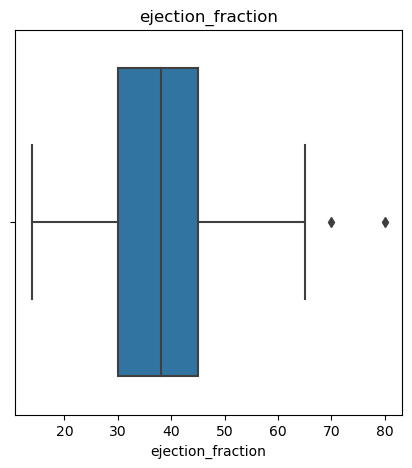

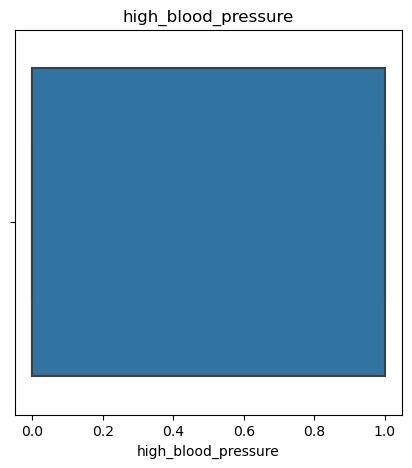

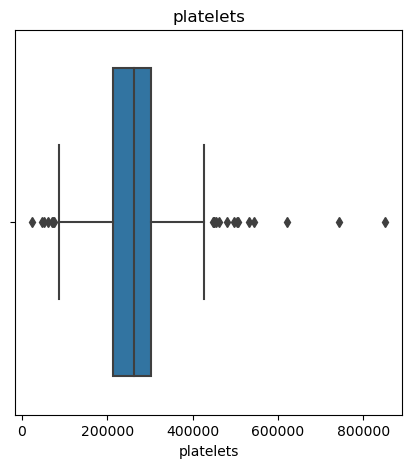

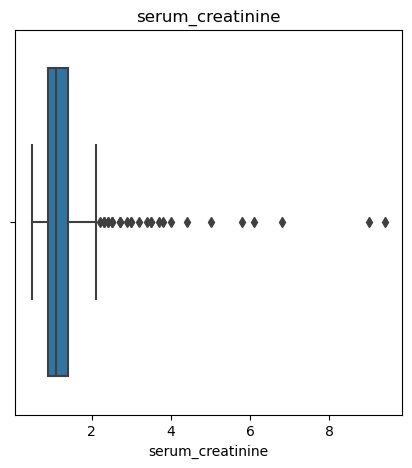

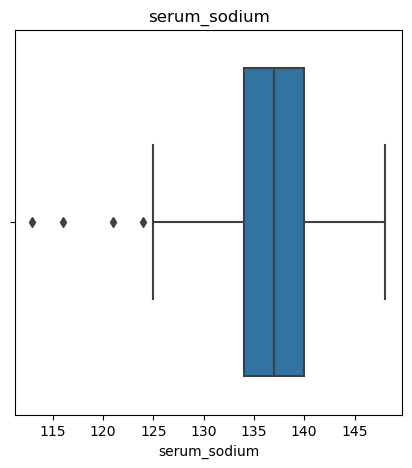

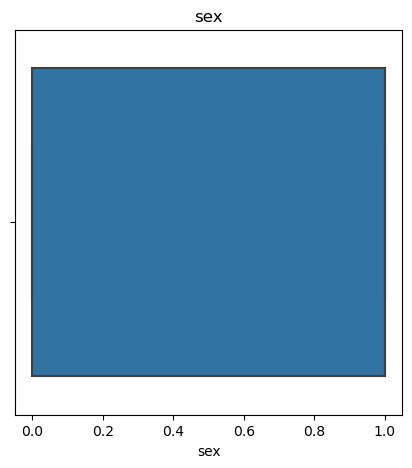

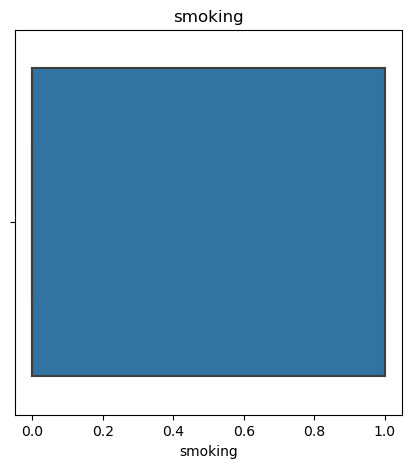

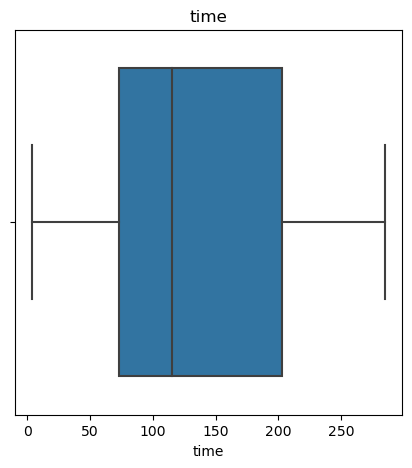

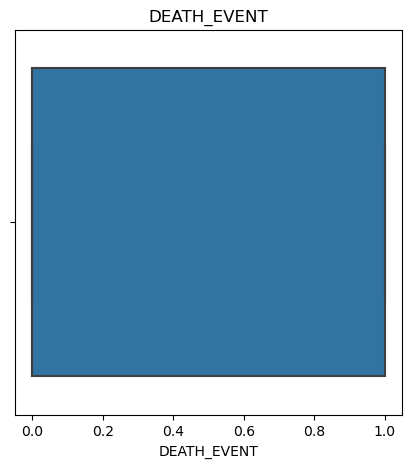

In [156]:
for feature in df:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[feature])
    plt.title(feature)

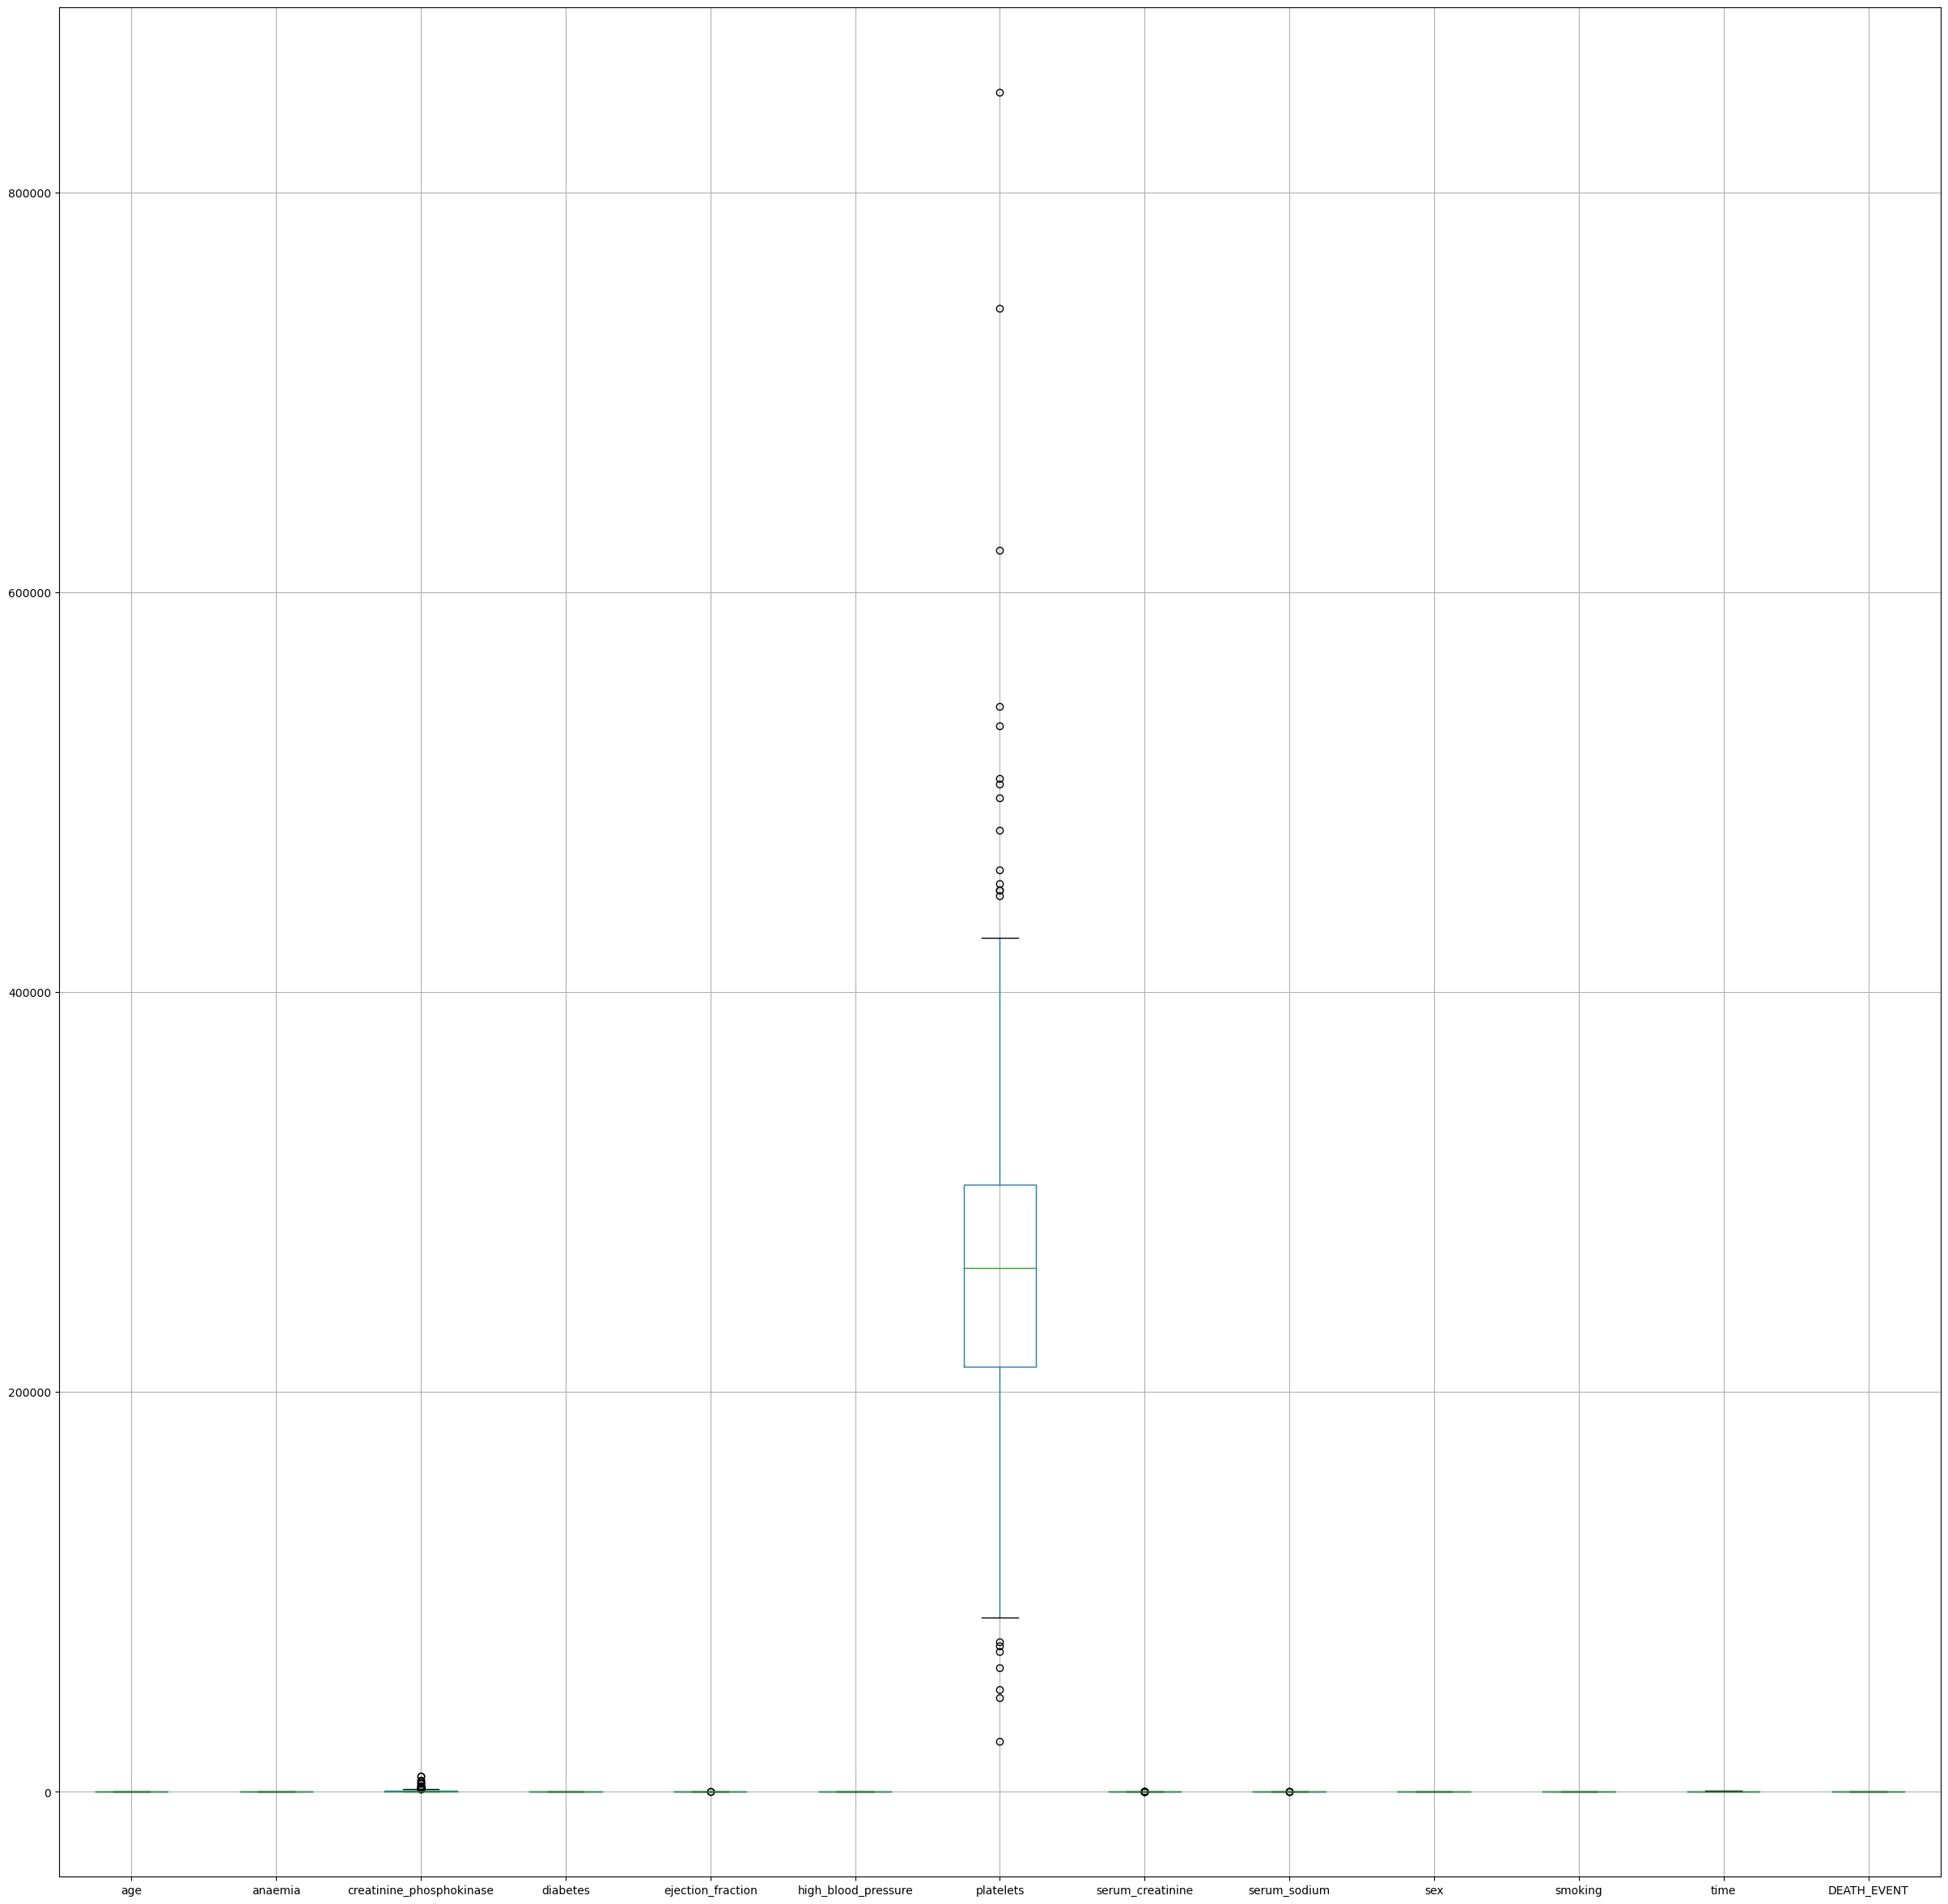

In [157]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

Boxplot diatas menunjukkan masih terdapat atribut dengan nilai outlier yang banyak.

Outlier treatment untuk menghilangkan outlier dari atribut numerik

In [158]:
outlier = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
print('outlier :',outlier)

outlier : ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']


Mengatasi outlier dengan IQR

In [159]:
features_with_outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

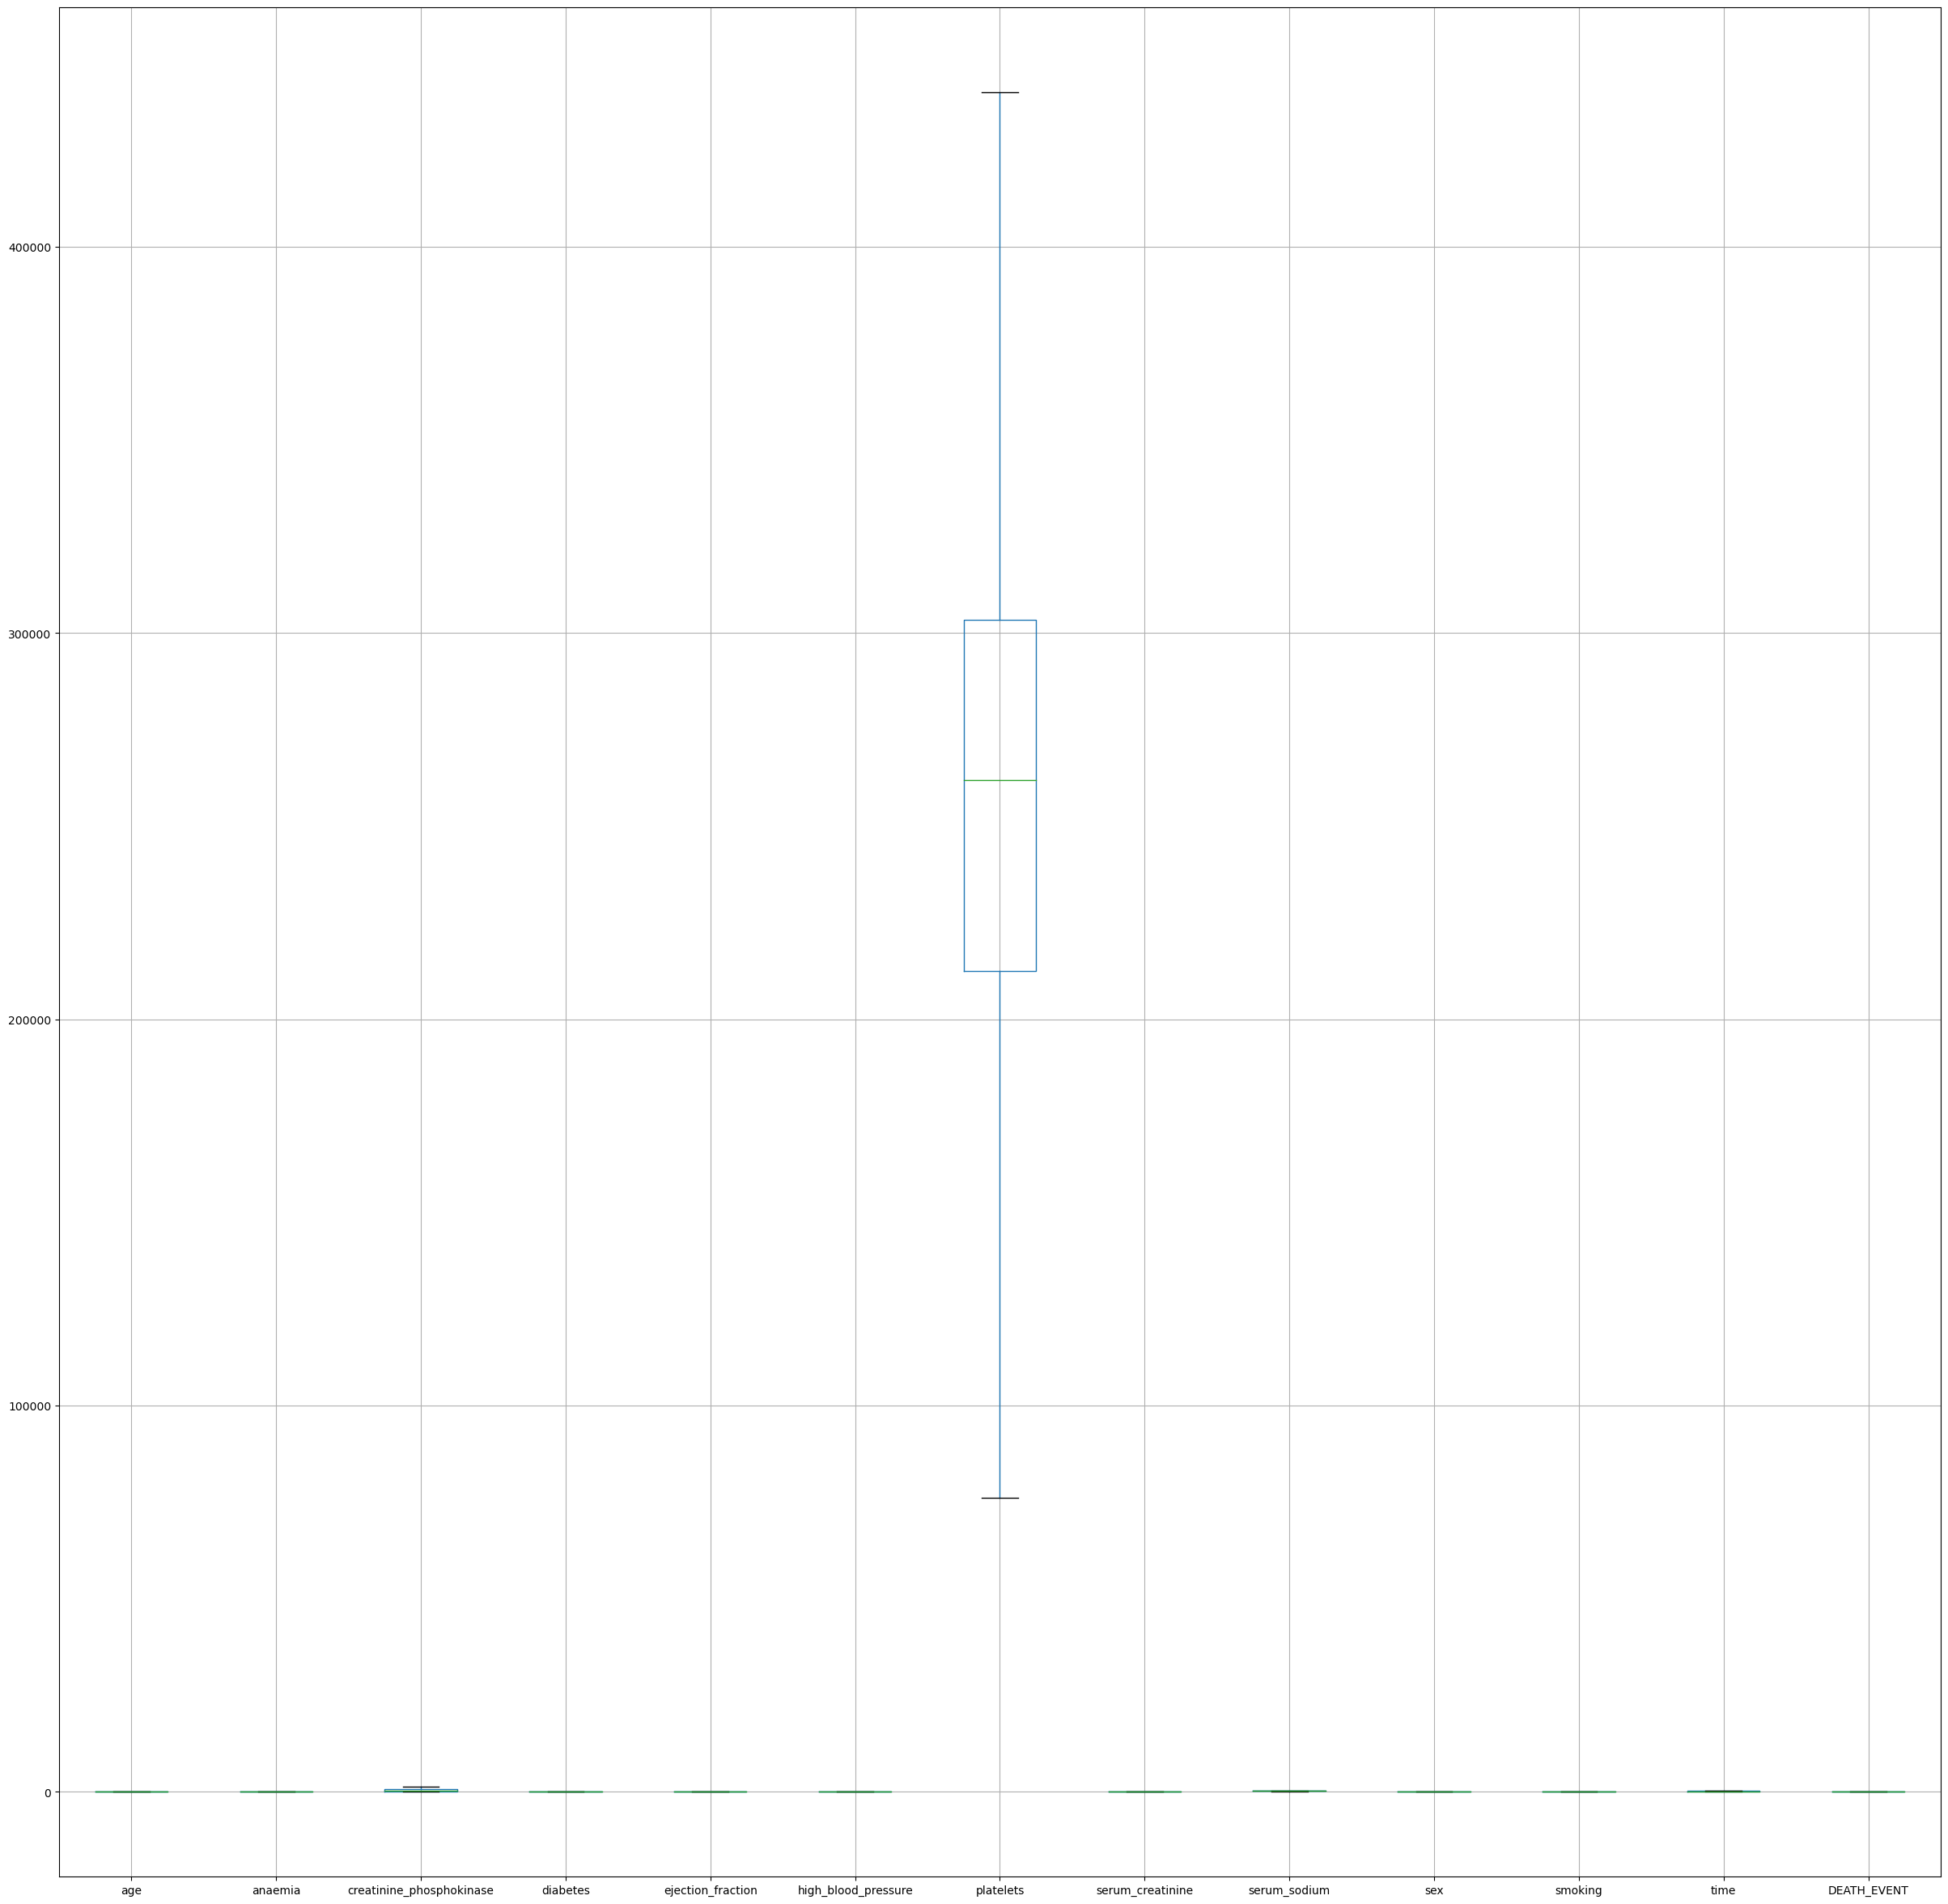

In [160]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

In [161]:
df[outlier].describe()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,424.214883,38.033445,259163.714883,1.234515,136.712375
std,385.449328,11.685643,81478.304369,0.440098,4.076971
min,23.000000,14.000000,76000.000000,0.500000,125.000000
25%,116.500000,30.000000,212500.000000,0.900000,134.000000
50%,250.000000,38.000000,262000.000000,1.100000,137.000000
75%,582.000000,45.000000,303500.000000,1.400000,140.000000
max,1280.250000,67.500000,440000.000000,2.150000,148.000000


Berdasarkan pembaharuan diatas atribut numerik sudah terbebas dari outlier

Mengganti nama atribut

In [162]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1


In [163]:
df1 = df.rename(columns={'age':'Usia', 
                        'anaemia':'Anemia', 
                        'creatinine_phosphokinase':'TesCPK', 
                        'diabetes':'Diabetes', 
                        'ejection_fraction':'EF', 
                        'high_blood_pressure':'Hipertensi', 
                        'platelets':'Trombosit', 
                        'serum_creatinine':'Serum_Kreatinina', 
                        'serum_sodium':'Serum_Sodium', 
                        'sex':'Gender', 
                        'smoking':'Merokok', 
                        'time':'Waktu', 
                        'DEATH_EVENT':'Kematian'})

df1.head()

,Usia,Anemia,TesCPK,Diabetes,EF,Hipertensi,Trombosit,Serum_Kreatinina,Serum_Sodium,Gender,Merokok,Waktu,Kematian
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1


In [164]:
df1.columns

Index(['Usia', 'Anemia', 'TesCPK', 'Diabetes', 'EF', 'Hipertensi', 'Trombosit',
       'Serum_Kreatinina', 'Serum_Sodium', 'Gender', 'Merokok', 'Waktu',
       'Kematian'],
      dtype='object')

## **Exploratory Data Analysis**

In [165]:
df1.describe()

,Usia,Anemia,TesCPK,Diabetes,EF,Hipertensi,Trombosit,Serum_Kreatinina,Serum_Sodium,Gender,Merokok,Waktu,Kematian
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,424.214883,0.418060,38.033445,0.351171,259163.714883,1.234515,136.712375,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,385.449328,0.494067,11.685643,0.478136,81478.304369,0.440098,4.076971,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,76000.000000,0.500000,125.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,1280.250000,1.000000,67.500000,1.000000,440000.000000,2.150000,148.000000,1.000000,1.00000,285.000000,1.00000


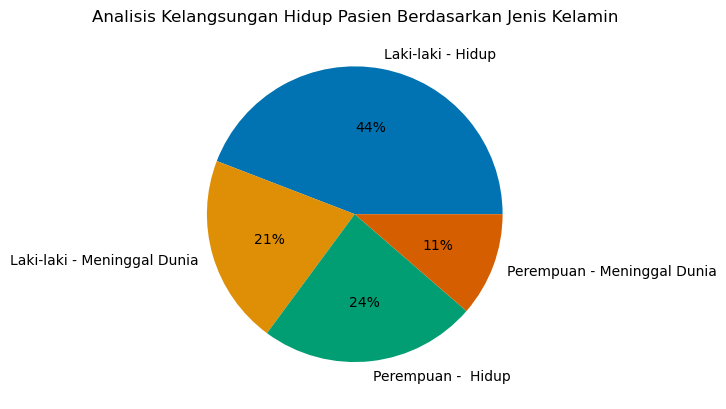

In [166]:
#L = Laki-laki
#P = Perempuan


L = df1[df1["Gender"] == 1]
P = df1[df1["Gender"] == 0]

## define the survival of L
L_alive = L[df1["Kematian"] == 0]
L_dead = L[df1["Kematian"] == 1]

## define the survival of P
P_alive = P[df1["Kematian"] == 0]
P_dead = P[df1["Kematian"] == 1]

## labels
labels = ['Laki-laki - Hidup','Laki-laki - Meninggal Dunia', "Perempuan -  Hidup", "Perempuan - Meninggal Dunia"]

## values
values = [len(L[df1["Kematian"]==0]),
          len(L[df1["Kematian"]==1]),
          len(P[df1["Kematian"]==0]),
          len(P[df1["Kematian"]==1])
]

## colors
colors = sns.color_palette('colorblind')[0:4]

## pie chart
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Analisis Kelangsungan Hidup Pasien Berdasarkan Jenis Kelamin")
plt.show()

Dari hasil pie chart diatas menunjukkan bahwa:
- 44% Pasien Laki-laki yang Hidup dan 21% Pasien Laki-laki yang Meninggal Dunia
- Sedangkan 24% Pasien Perempuan yang Hidup dan 11% Pasien Perempuan yang Minggal Dunia

Melihat Trombosit pasien dengan penyakit jantung terbanyak dan terendah

In [167]:
df1['Trombosit'].agg(('min', 'max'))

min     76000.0
max    440000.0
Name: Trombosit, dtype: float64

Dari data diatas maka dapat diketahui bahwa trombosit terkecil pasien yaitu 25100.0, dan trombosit terbanyak pasien yaitu 850000.0. Kadar trombosit yang normal pada setiap manusia berkisar 150.000-450.000 per mikroliter darah

Melihat kadar serum kreatinina pada pasien dengan penyakit jantung tertinggi dan terendah

In [168]:
df1['Serum_Kreatinina'].agg(('min','max'))

min    0.50
max    2.15
Name: Serum_Kreatinina, dtype: float64

Dari data diatas dapat diketahui bahwa kadar serum keratin terkecil pasien yaitu 0.5 mg/dL dan kadar serum keratin tertinggi yaitu 9.4 mg/dL. Kreatin adalah zat yang dihasilkan dari konstraksi otot normal dan dilepaskan ke dalam darah, kemudian melewati ginjal untuk diekskresikan. Nilai normal kreatinin serum pada Laki-laki dan Perempuan adalah 0,6 - 1,3 mg/dL.

Melihat proporsi data pada kolom Usia dan Kematian menggunakan .cosstab()

In [169]:
pd.crosstab(df1.Kematian, df1.Usia)

Usia,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,...,79.0,80.0,81.0,82.0,85.0,86.0,87.0,90.0,94.0,95.0
Kematian,,,,,,,,,,,,,,,,,,,,,
0,7,1,6,1,2,13,2,1,0,3,...,1,2,1,0,3,0,0,1,0,0
1,0,0,1,0,0,6,1,0,2,1,...,0,5,0,3,3,1,1,2,1,2


Grouping data pada kolom Usia dan Kematian untuk melihat rata-ratanya

In [170]:
df1[['Usia','Kematian']].groupby('Kematian').mean().sort_values(by='Usia',ascending=True)

,Usia
Kematian,
0,58.758621
1,65.208333


Dilihat dari data diatas dapat diketahui bahwa rata-rata Usia pasien Meninggal Dunia berada pada usia 65 tahun, sedangkan rata-rata pasien yang bertahan hidup berada pada usia 58 tahun

In [171]:
df1[
    (df1['Usia'] > 50.0) &
    (df1['Serum_Kreatinina'] == 1) &
    (df1['Serum_Sodium'] == 140) 
].head()

,Usia,Anemia,TesCPK,Diabetes,EF,Hipertensi,Trombosit,Serum_Kreatinina,Serum_Sodium,Gender,Merokok,Waktu,Kematian
18,70.0,1,125.00,0,25.0,1,237000.0,1.0,140,0,0,15,1
34,65.0,0,94.00,1,50.0,1,188000.0,1.0,140,1,0,29,1
49,57.0,1,129.00,0,30.0,0,395000.0,1.0,140,0,0,42,1
67,72.0,1,110.00,0,25.0,0,274000.0,1.0,140,1,1,65,1
227,55.0,1,1280.25,0,35.0,1,141000.0,1.0,140,1,0,206,0


Melihat proporsi data Status Kematian berdasarkan Gender dan Hipertensi

In [172]:
df1['Jenis_Kelamin'] = df1['Gender'].replace({1:'Pria',0:'Wanita'})
df1['Status_Kematian'] = df1['Kematian'].replace({1:'Meninggal', 0:'Hidup'})
df1.head()

,Usia,Anemia,TesCPK,Diabetes,EF,Hipertensi,Trombosit,Serum_Kreatinina,Serum_Sodium,Gender,Merokok,Waktu,Kematian,Jenis_Kelamin,Status_Kematian
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1,Pria,Meninggal
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1,Pria,Meninggal
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1,Pria,Meninggal
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1,Pria,Meninggal
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1,Wanita,Meninggal


Melakukan grouping untuk atribut Jenis_Kelamin, Hipertensi dan Status Kematian

In [173]:
df1.groupby(['Jenis_Kelamin', 'Hipertensi', 'Status_Kematian']).size().unstack().apply(lambda x: x/x.sum(),axis=1)

Status_Kematian              Hidup  Meninggal
Jenis_Kelamin Hipertensi                     
Pria          0           0.699248   0.300752
              1           0.639344   0.360656
Wanita        0           0.721311   0.278689
              1           0.613636   0.386364

Dari hasil di atas terlihat bahwa ada beberapa perbedaan hubungan, namun perbedaan tersebut lebih terkait dengan status hipertensi pasien daripada jenis kelamin. Jenis kelamin tidak berpengaruh signifikan terhadap status kematian. Pasien wanita tanpa hipertensi memiliki angka kematian sekitar 27,86%, pasien hipertensi sekitar 38,63%, sedangkan pasien pria tanpa hipertensi memiliki angka kematian sekitar 30% dan untuk pasien hipertensi sekitar 36%. Hal ini menunjukkan bahwa nilai hipertensi berpengaruh signifikan terhadap status kematian.

Melihat presentase status kematian

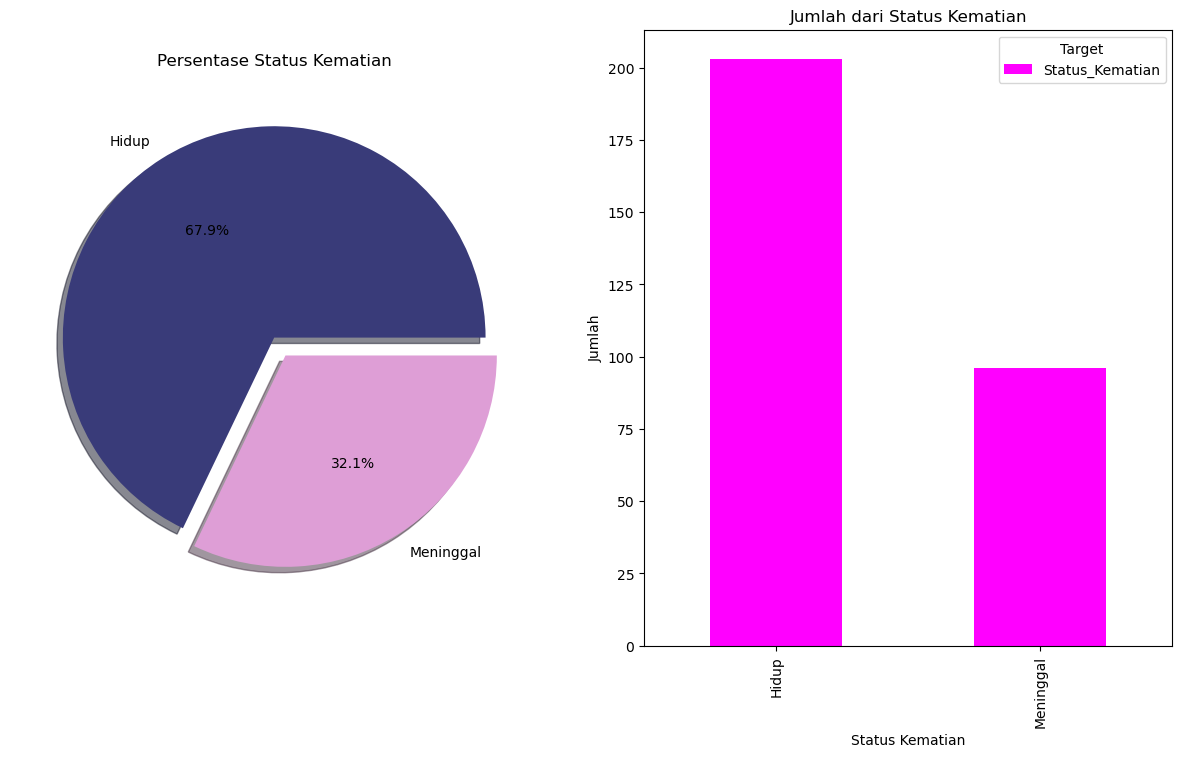

In [174]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

#Pie Chart Persentase Status Kematian
df1['Status_Kematian'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    explode=[0,0.1],
    cmap='tab20b',
    shadow=True
)
ax[0].set_title('Persentase Status Kematian')
ax[0].set_ylabel('')

#Barchart untuk setiap nilai pada kelas target
df1.groupby('Status_Kematian').agg({'Status_Kematian':'count'}).plot(
    kind='bar',
    ax=ax[1],
    color='magenta'
)
ax[1].set_title('Jumlah dari Status Kematian')
ax[1].set_ylabel('Jumlah')
ax[1].set_xlabel('Status Kematian')
ax[1].legend(title='Target')

Dari hasil viasualisasi diatas dapat dilihat bahwa presentase status kematian untuk pasien Hidup sebesar 67.9% sedangkan untuk pasien Meninggal sebesar 32.1%

## Melihat Persebaran jumlah kematian pasien berdasaarkan usia

Text(0.5, 1.0, 'Persebaran Jumlah Kematian Pasien Berdasarkan Usia')

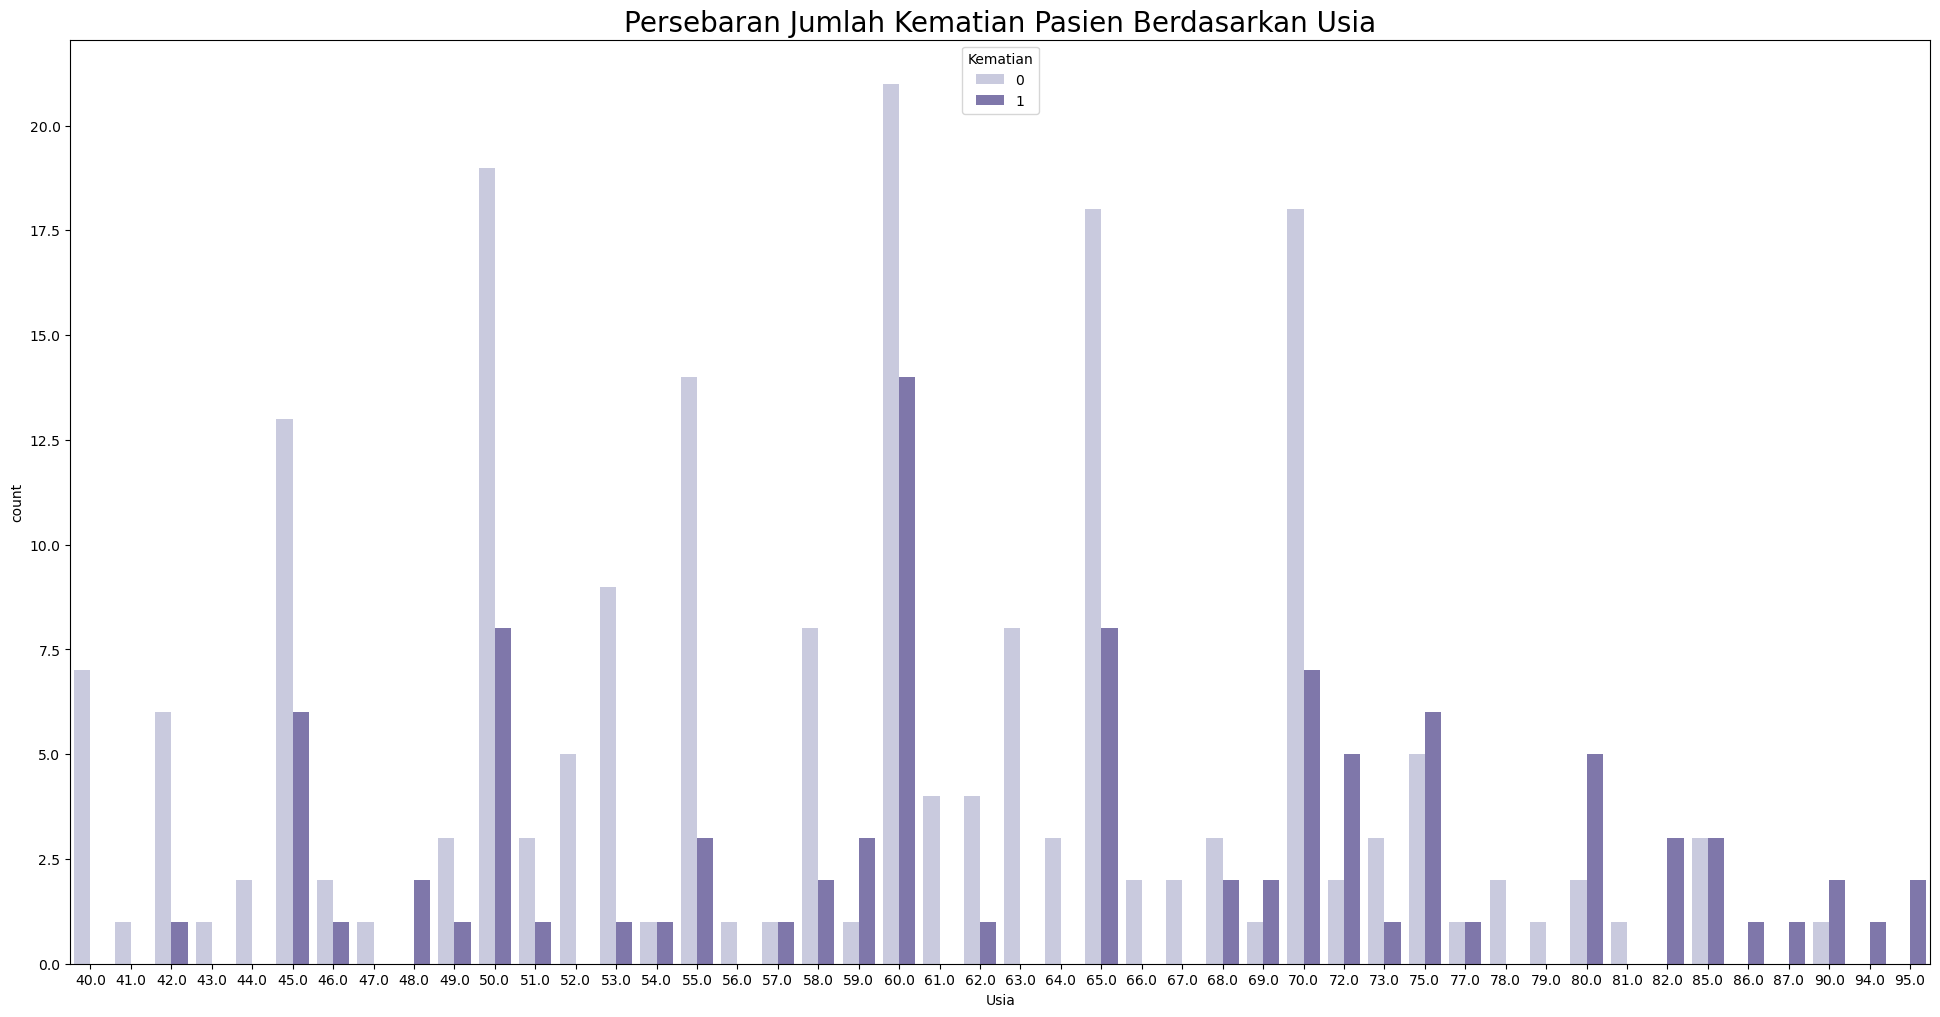

In [175]:
plt.figure(figsize=(24,12))
ax = sns.countplot(x="Usia", hue="Kematian", data=df1, palette='Purples')
plt.title('Persebaran Jumlah Kematian Pasien Berdasarkan Usia', fontsize=20)

Dari hasil bar chart diatas dapat dilihat bahwa persebaran kematian tertinggi ada pada usia 60 tahun dan persebaran kematian yang memiliki nilai sama atau hampir setara ada pada usia 54 tahun, 57 tahun, dan 77 tahun.

Text(0.5, 1.0, 'Tekanan Darah Tinggi vs Ejection Fraction')

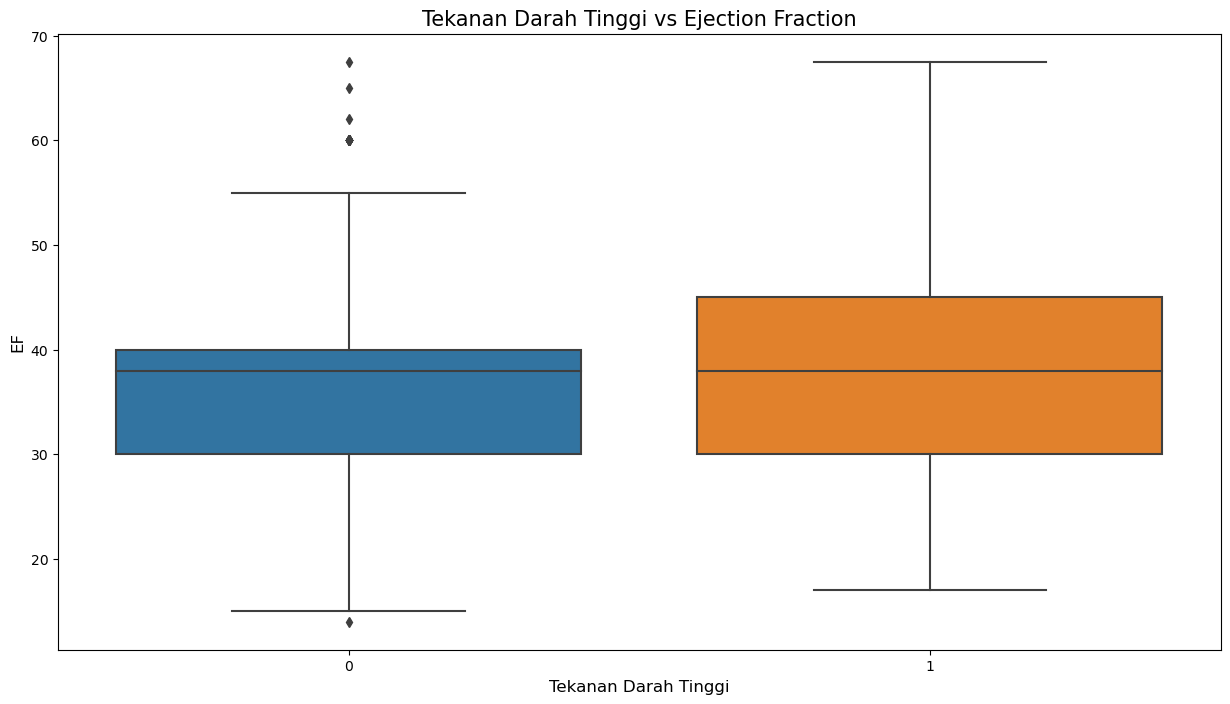

In [176]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.boxplot(x='Hipertensi', y='EF', data=df1)

plt.xlabel("Tekanan Darah Tinggi", fontsize= 12)
plt.ylabel("EF", fontsize= 12)
plt.title("Tekanan Darah Tinggi vs Ejection Fraction", fontsize= 15)

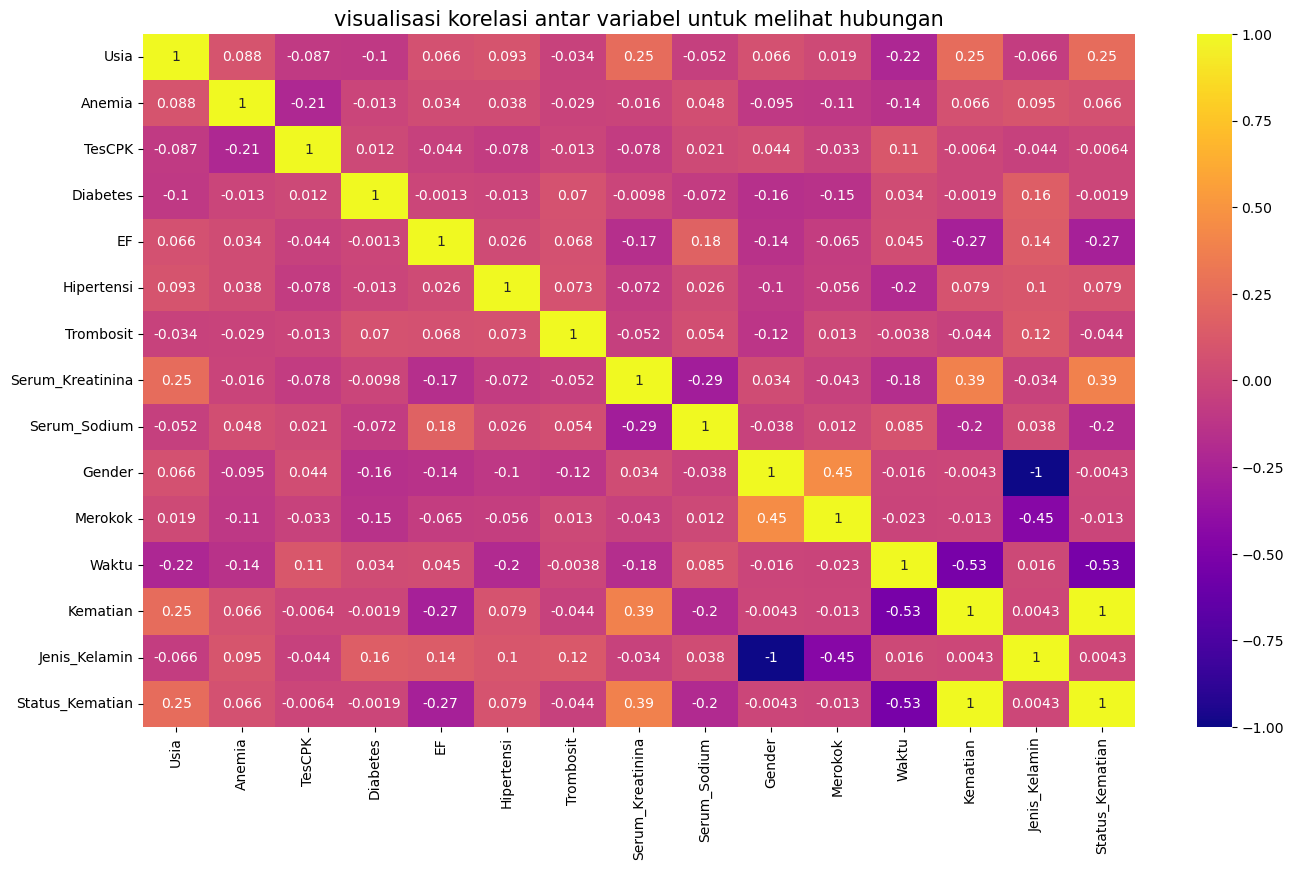

In [201]:
plt.figure(figsize=(16, 9))
sns.heatmap(df1.corr(), annot=True, cmap='plasma')
plt.title("visualisasi korelasi antar variabel untuk melihat hubungan", fontsize= 15)
plt.show()

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa

- Merokok dan Gender memiliki korelasi tinggi yaitu 0.45
- Waktu memiliki korelasi rendah dengan Kematian yaitu -0.53
- Serum_Kreatinin memiliki korelasi tinggi dengan Kematian dengan nilai 0.29
- Usia juga memiliki korelasi tinggi dengan Kematian dengan nilai 0.25

## **Data Preprocessing**

In [178]:
cat_col = df1.select_dtypes(object).columns.tolist()
len(cat_col)

2

Mengkonversi nilai kategori menjadi numerik

In [179]:
categorical = [i for i in df1.columns if df1[i].dtypes == 'O']
numerical = [i for i in df1.columns if i not in categorical] 
print('categorical :', categorical)
print('numerical :', numerical)

categorical : ['Jenis_Kelamin', 'Status_Kematian']
numerical : ['Usia', 'Anemia', 'TesCPK', 'Diabetes', 'EF', 'Hipertensi', 'Trombosit', 'Serum_Kreatinina', 'Serum_Sodium', 'Gender', 'Merokok', 'Waktu', 'Kematian']


In [180]:
le = LabelEncoder()
df1[cat_col] =df1[cat_col].astype('str').apply(le.fit_transform)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Usia              299 non-null    float64
 1   Anemia            299 non-null    int64  
 2   TesCPK            299 non-null    float64
 3   Diabetes          299 non-null    int64  
 4   EF                299 non-null    float64
 5   Hipertensi        299 non-null    int64  
 6   Trombosit         299 non-null    float64
 7   Serum_Kreatinina  299 non-null    float64
 8   Serum_Sodium      299 non-null    int64  
 9   Gender            299 non-null    int64  
 10  Merokok           299 non-null    int64  
 11  Waktu             299 non-null    int64  
 12  Kematian          299 non-null    int64  
 13  Jenis_Kelamin     299 non-null    int32  
 14  Status_Kematian   299 non-null    int32  
dtypes: float64(5), int32(2), int64(8)
memory usage: 32.8 KB


In [181]:
df1.head()

,Usia,Anemia,TesCPK,Diabetes,EF,Hipertensi,Trombosit,Serum_Kreatinina,Serum_Sodium,Gender,Merokok,Waktu,Kematian,Jenis_Kelamin,Status_Kematian
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1,0,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1,0,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1,0,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1,0,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1,1,1


In [182]:
df1.tail()

,Usia,Anemia,TesCPK,Diabetes,EF,Hipertensi,Trombosit,Serum_Kreatinina,Serum_Sodium,Gender,Merokok,Waktu,Kematian,Jenis_Kelamin,Status_Kematian
294,62.0,0,61.00,1,38.0,1,155000.0,1.1,143,1,1,270,0,0,0
295,55.0,0,1280.25,0,38.0,0,270000.0,1.2,139,0,0,271,0,1,0
296,45.0,0,1280.25,1,60.0,0,440000.0,0.8,138,0,0,278,0,1,0
297,45.0,0,1280.25,0,38.0,0,140000.0,1.4,140,1,1,280,0,0,0
298,50.0,0,196.00,0,45.0,0,395000.0,1.6,136,1,1,285,0,0,0


Drop atribut kematian

In [183]:
X = df1.drop(['Kematian'], axis=1)
y = df1['Kematian']
print(X.shape)
print(y.shape)

(299, 14)
(299,)


# Feature Selection

Pada bagian ini berisi proses memilih fitur yang paling berpengaruh terhadap model

In [184]:
etc = ExtraTreesClassifier()
etc.fit(X,y)

ExtraTreesClassifier()

Melakukan feature selection menggunakan library F regression dengan k=10

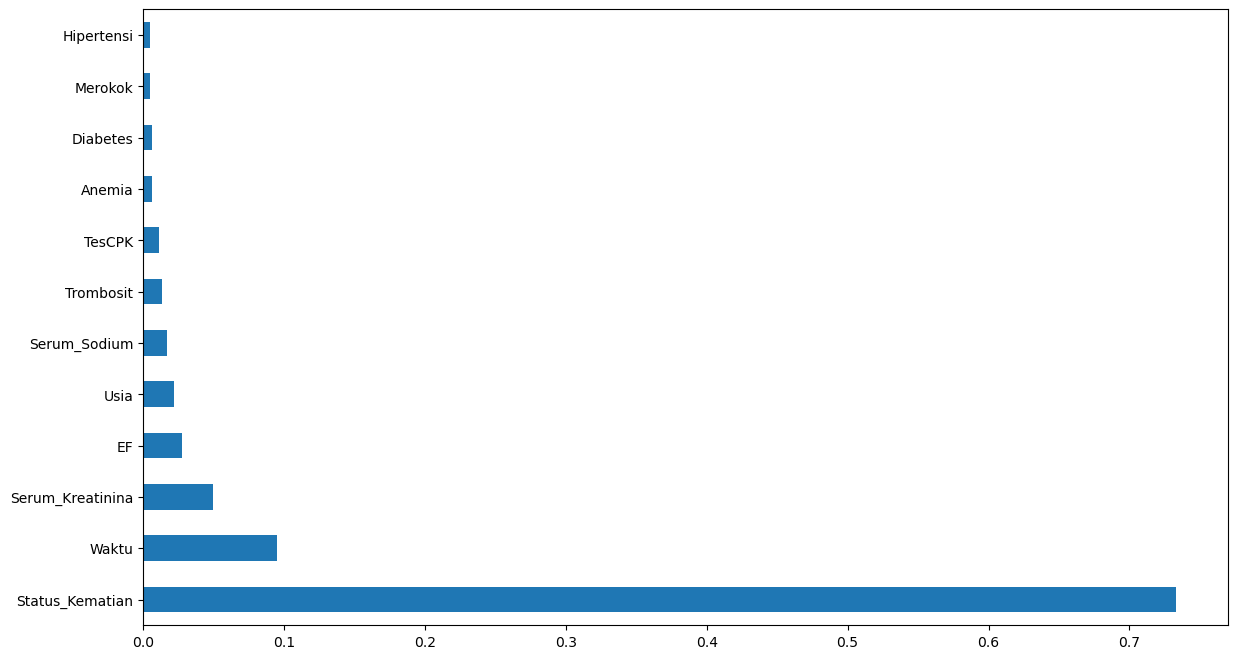

In [185]:
plt.figure(figsize=(14,8))
feat_importances= pd.Series(etc.feature_importances_,index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

Setelah fitur yang paling mempengaruhi model diperoleh, inisialisasi akhir dari variabel X dilakukan, yang digunakan sebagai training model. 

Dalam hal ini dipilih 5 atribut dengan pengaruh terbesar berdasarkan uji seleksi fitur yang telah dilakukan, yaitu atribut Serum_Sodium, Usia, EF, Serum_Keratinina dan Waktu. 

In [186]:
X_fit = df1[['Usia','EF','Serum_Sodium','Serum_Kreatinina','Waktu']]
X_fit.head()

,Usia,EF,Serum_Sodium,Serum_Kreatinina,Waktu
0,75.0,20.0,130,1.90,4
1,55.0,38.0,136,1.10,6
2,65.0,20.0,129,1.30,7
3,50.0,20.0,137,1.90,7
4,65.0,20.0,125,2.15,8


## Model Defining

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.

Membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2

In [187]:
# Melakukan splitting data
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.2,random_state=46)

Model yang pertama kami menggunakan DecisionTree dengan metode ensamble Bagging Classifier

In [188]:
model1 = DecisionTreeClassifier()
bag_model = BaggingClassifier(base_estimator=model1, n_estimators=100, bootstrap=True)

Metode yang kedua kami menggunakan ensamble Random Forest Classifier

In [189]:
model2 = RandomForestClassifier(n_estimators=50,random_state=46)

Metode yang ketiga kami menggunakan ensamble Gradient Boosting Classifier

In [190]:
model3 = GradientBoostingClassifier(n_estimators=100, random_state=46)

## **Model Training**

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [191]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [192]:
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=46)

In [193]:
model3.fit(X_train, y_train)

GradientBoostingClassifier(random_state=46)

## **Model Evaluation**
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih.

> **Bagging Classifier**

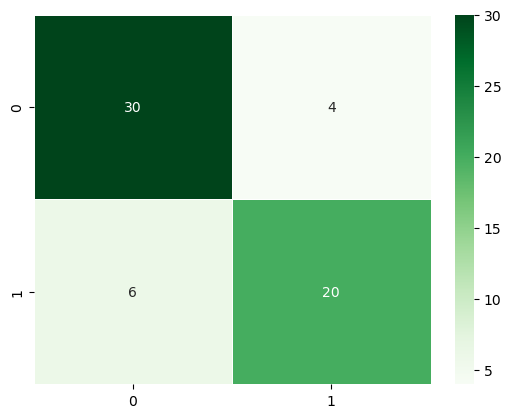

Training accuracy score:  1.0
Testing accuracy score:  0.8333333333333334
Cross-validation scores:[0.77083333 0.77083333 0.85416667 0.875      0.80851064]
Average cross-validation score: 0.815868794326241
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        34
           1       0.83      0.77      0.80        26

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [194]:
y_pred = bag_model.predict(X_test)

bagg = confusion_matrix(y_test, y_pred)
sns.heatmap(bagg, annot=True, fmt="d", linewidths=.5, cmap = 'Greens')
plt.show()

print("Training accuracy score: ",bag_model.score(X_train, y_train))
print("Testing accuracy score: ",accuracy_score(y_pred, y_test))
scores = cross_val_score(bag_model, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
print(classification_report(y_test, y_pred))

> **Random Forest Classifier**

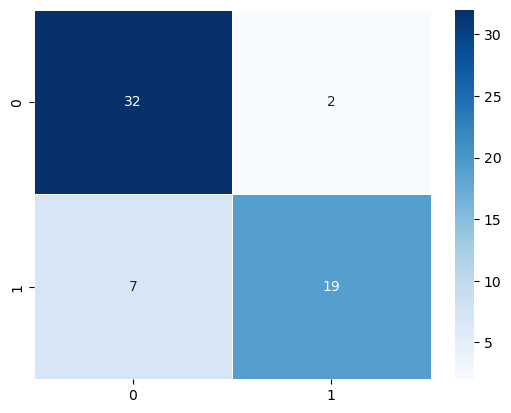

Training accuracy score:  1.0
Testing accuracy score:  0.85
Cross-validation scores:[0.79166667 0.8125     0.89583333 0.89583333 0.78723404]
Average cross-validation score: 0.836613475177305
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        34
           1       0.90      0.73      0.81        26

    accuracy                           0.85        60
   macro avg       0.86      0.84      0.84        60
weighted avg       0.86      0.85      0.85        60



In [195]:
y_pred = model2.predict(X_test)

rf = confusion_matrix(y_test, y_pred)
sns.heatmap(rf, annot=True, fmt="d", linewidths=.5, cmap = 'Blues')
plt.show()

print("Training accuracy score: ",model2.score(X_train, y_train))
print("Testing accuracy score: ",accuracy_score(y_pred, y_test))
scores = cross_val_score(model2, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
print(classification_report(y_test, y_pred))

> **Gradient Boosting Classifier**

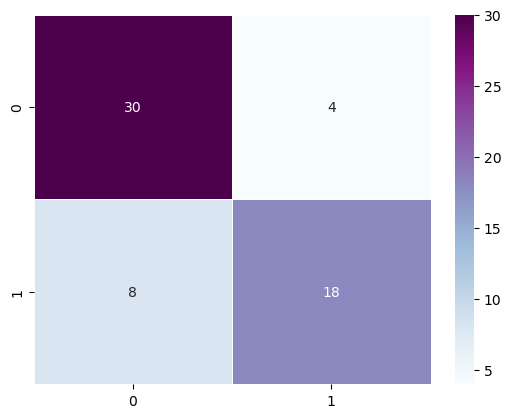

Training accuracy score:  0.9916317991631799
Testing accuracy score:  0.8
Cross-validation scores:[0.8125     0.83333333 0.875      0.875      0.82978723]
Average cross-validation score: 0.8451241134751774
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        34
           1       0.82      0.69      0.75        26

    accuracy                           0.80        60
   macro avg       0.80      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



In [196]:
y_pred = model3.predict(X_test)

gb = confusion_matrix(y_test, y_pred)
sns.heatmap(gb, annot=True, fmt="d", linewidths=.5, cmap = 'BuPu')
plt.show()

print("Training accuracy score: ",model3.score(X_train, y_train))
print("Testing accuracy score: ",accuracy_score(y_pred, y_test))
scores = cross_val_score(model3, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
print(classification_report(y_test, y_pred))

Di antara hasil dari ketiga model yang digunakan, model ensembel Random Forest Classifier memiliki nilai skor model terbaik dibandingkan dengan Model Bagging Classifier dan Model Gradient Boosting Classifier. Oleh karena itu, model Random Forest Classifier merupakan model yang baik untuk memprediksi kematian pada pasien gagal jantung. 

## **Model Inference**
Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

In [197]:
X_new = {'Usia':[81,42,50,65,74],'EF':[25,30,35,38,22],'Serum_Sodium':[133,138,120,140,116],
        'Serum_Kreatinin':[1.4,3.9,2,1.1,2.3],'Waktu':[1,2,3,4,5]}
X_new = pd.DataFrame(X_new)
X_new.head()

,Usia,EF,Serum_Sodium,Serum_Kreatinin,Waktu
0,81,25,133,1.4,1
1,42,30,138,3.9,2
2,50,35,120,2.0,3
3,65,38,140,1.1,4
4,74,22,116,2.3,5


Melakukan Standarisasi pada data baru

In [198]:
from sklearn.discriminant_analysis import StandardScaler

scal = StandardScaler()
X_new = scal.fit_transform(X_new)

In [199]:
list(X_new)

[array([ 1.2791438 , -0.8380019 ,  0.37242265, -0.75747186, -1.41421356]),
 array([-1.40293191,  0.        ,  0.88967633,  1.8015547 , -0.70710678]),
 array([-0.85276253,  0.8380019 , -0.97243692, -0.14330549,  0.        ]),
 array([ 0.17880505,  1.34080305,  1.0965778 , -1.06455505,  0.70710678]),
 array([ 0.79774559, -1.34080305, -1.38623986,  0.1637777 ,  1.41421356])]

Melakukan prediksi pada data baru

In [200]:
y_pred_new = model2.predict(X_new)
print('Prediksi Pasien yaitu: ')
print(y_pred_new)

Prediksi Pasien yaitu: 
[1 1 1 1 1]


## **Kesimpulan**
- Terdapat 13 karakteristik yang diyakini mempengaruhi kematian pasien gagal jantung. Setelah analisis, kami mengidentifikasi 5 karakteristik/faktor model yang paling berpengaruh.
- Pada dataset tidak ada nilai Missing Value untuk setiap atribut dalam dataset
- Faktor yang secara signifikan mempengaruhi kematian pasien gagal jantung adalah Usia, Ejection Fraction (EF), Serum kreatinina, Serum Sodium dan Waktu.
- Dalam proyek ini kami menggunakan Ensemble Bagging Classifier, Random Forest Classifier dan Gradient Boosting Classifier
- Model ansambel Random Forest Classifier memiliki skor model terbaik dibandingkan dengan Bagging Classifier dan Gradient Boosting. Oleh karena itu, model random forest classifier merupakan model yang baik untuk memprediksi kematian pada pasien gagal jantung.
- Model Bagging Classifier memiliki presisi **0,80**, presisi **0,79**, recall **0,73** dan skor F1 **0,76**.
- Model Random Forest Classifier memiliki presisi **0,85**, presisi **0,90**, recall **0,73**, dan skor F1 **0, 81**.
- Model Gradient Boosting Classifier memiliki presisi **0,80**, presisi **0,82**, recall **0,69**, dan skor F1 **0, 75**. 